# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the training data

In [2]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')

x=dfx.values #into a numpy array format
y=dfy.values
#print(x)
#print(y)
#print(dfx)

print(x.shape)
print(y.shape)


(99, 1)
(99, 1)


## Visualise and Preprocess

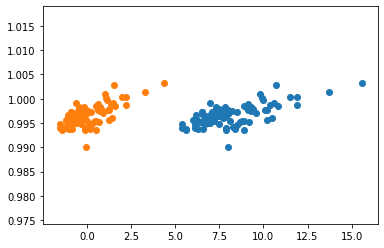

In [3]:
plt.scatter(x,y)
X=(x-x.mean())/x.std() #normalise data
#The goal of normalization is to change the values of numeric 
#columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, 
#every dataset does not require normalization. It is required only when features have different ranges.
#print(X)
Y=y
plt.scatter(X,Y) #orange,close data
plt.show()

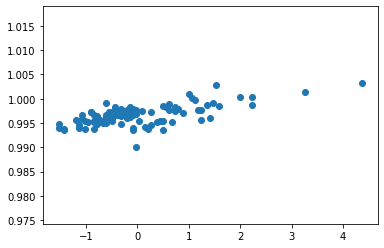

In [4]:
plt.scatter(X,Y) #X and Y scale are not far away
plt.show()

In [5]:
#generate a line best fits the data above,optimal values of the factors,above points are training points

## Gradient Algorithm
- Start with a random theta
- Repeat until converge
    - Update theta according to the rule

In [52]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x #x is some scalar

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta) #going over all points Xi
        error+=(hx-Y[i])**2

    return error

def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad
        


##Algorithm
def gradientDescent(X,Y,learning_rate=0.001):  #threshold=): 
    #theta=np.zeros((2,))
    #for 3d plot of grad
    theta=np.array([-2.0,0.0]) 
    itr=0 #no of iterations                    
    max_itr=100                                
    
    error_list=[]
    theta_list=[]
    
    while(itr<=max_itr):       #while(delta_error>=0.001)
        grad=gradient(X,Y,theta) #new theta val jayegi check aage ke steps
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1])) #either as a tuple like here or array (theta])
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
        
    return theta,error_list,theta_list
    


In [53]:
final_theta, error_list,theta_list=gradientDescent(X,Y)

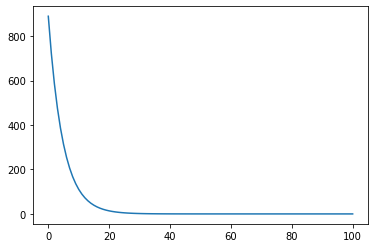

In [54]:
plt.plot(error_list)
plt.show() # if learning rate X10 then this graph would converge early matlab error phle hi reduce ho jayega,step size badha diya
#isliye jaldi converge but agar like learning rate=0.1 then algo will diverge (error increase) so choose suitable LR 

In [55]:
print(final_theta)

[0.996554  0.0013579]


### Plot the line for testing data

In [56]:
xtest=np.linspace(0,10,5) #suppose we want to generate 5 points in a given range equally spaced
print(xtest)

[ 0.   2.5  5.   7.5 10. ]


In [11]:
#as per current example the suitable range would be -2,6 (check scaterd graph just above grad algo) some space before -1 therefore assume -2ish same way 6

In [57]:
xtest=np.linspace(-2,6,10) #suppose we want to generate 5 points in a given range equally spaced
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


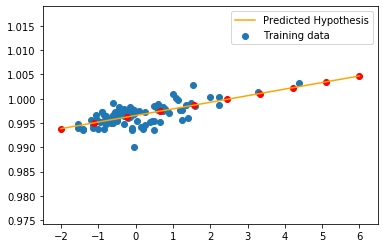

In [58]:
plt.scatter(X,Y,label='Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Predicted Hypothesis')
plt.legend()
plt.scatter(xtest,hypothesis(xtest,final_theta),color='red',label='Predicted Hypothesis') #line ke jo points hai vo
plt.show()

### If no of iterations is reduced to 10 suppose we can see how the graph of error changes and error does not
### decrease much ,error will be more and the line would not be able to tackle all the points of training data

## play with learning rate

# Visualising Gradient Descent 

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Generating a surface

In [16]:
a=[1,2,3]
b=[4,5,6,7]

a,b=np.meshgrid(a,b) #repeat 'a' the no of times element in 'b' are,b is repeated the no of times the element in a,new a and b
                     #same shape 
print(a)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


In [17]:
a=[-3,-2,-1,0,1,2,3]
b=a

a,b=np.meshgrid(a,b)

print(a)
print(b)

[[-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]]
[[-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]]


In [18]:
m=a.shape[0]
n=a.shape[1]
print(m,n)

for i in range(m):
    for j in range(n):
        print("(%d,%d)"%(b[i,j],a[i,j]),end=" ")
    print()    


7 7
(-3,-3) (-3,-2) (-3,-1) (-3,0) (-3,1) (-3,2) (-3,3) 
(-2,-3) (-2,-2) (-2,-1) (-2,0) (-2,1) (-2,2) (-2,3) 
(-1,-3) (-1,-2) (-1,-1) (-1,0) (-1,1) (-1,2) (-1,3) 
(0,-3) (0,-2) (0,-1) (0,0) (0,1) (0,2) (0,3) 
(1,-3) (1,-2) (1,-1) (1,0) (1,1) (1,2) (1,3) 
(2,-3) (2,-2) (2,-1) (2,0) (2,1) (2,2) (2,3) 
(3,-3) (3,-2) (3,-1) (3,0) (3,1) (3,2) (3,3) 


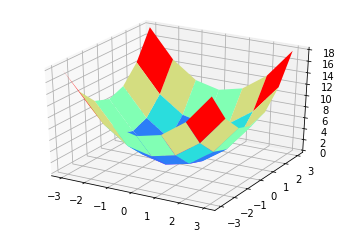

In [19]:
fig=plt.figure()
axes=fig.gca(projection='3d')
#axes?
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow') #a,b,elevation
plt.show()


In [20]:
a=np.arange(-4,4,0.02) #range(-4,4) 0.02 difference b/w points
b=a

a,b=np.meshgrid(a,b)

print(a)
print(b)

[[-4.   -3.98 -3.96 ...  3.94  3.96  3.98]
 [-4.   -3.98 -3.96 ...  3.94  3.96  3.98]
 [-4.   -3.98 -3.96 ...  3.94  3.96  3.98]
 ...
 [-4.   -3.98 -3.96 ...  3.94  3.96  3.98]
 [-4.   -3.98 -3.96 ...  3.94  3.96  3.98]
 [-4.   -3.98 -3.96 ...  3.94  3.96  3.98]]
[[-4.   -4.   -4.   ... -4.   -4.   -4.  ]
 [-3.98 -3.98 -3.98 ... -3.98 -3.98 -3.98]
 [-3.96 -3.96 -3.96 ... -3.96 -3.96 -3.96]
 ...
 [ 3.94  3.94  3.94 ...  3.94  3.94  3.94]
 [ 3.96  3.96  3.96 ...  3.96  3.96  3.96]
 [ 3.98  3.98  3.98 ...  3.98  3.98  3.98]]


In [21]:
m=a.shape[0]
n=a.shape[1]
print(m,n)

for i in range(m):
    for j in range(n):
        print("(%d,%d)"%(b[i,j],a[i,j]),end=" ")
    print()    


400 400
(-4,-4) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-3) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-2) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) (-4,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-3,-4) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-3) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-2) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) (-3,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-2,-4) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-3) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-2) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) (-2,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(-1,-4) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-3) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-2) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) (-1,-1) 

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(0,-4) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-3) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-2) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1) (0,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(1,-4) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-3) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-2) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1) (1,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(2,-4) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-3) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-2) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1) (2,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

(3,-4) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-3) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-2) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1) (3,-1)

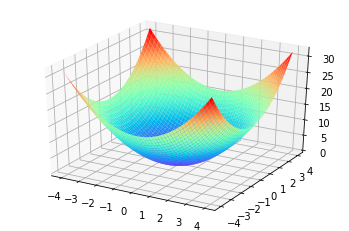

In [22]:
fig=plt.figure()
axes=fig.gca(projection='3d')
#axes?
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow') #a,b,elevation
plt.show()


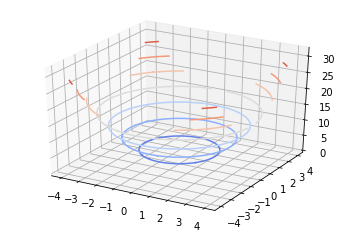

In [23]:
fig=plt.figure()
axes=fig.gca(projection='3d')
#axes?
axes.contour(a,b,a**2+b**2,cmap='coolwarm') #a,b,elevation , contour plot
plt.show()


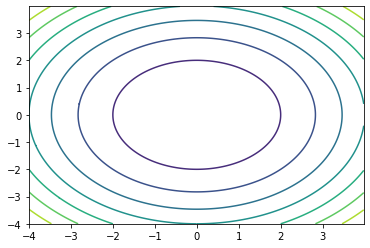

In [24]:
plt.contour(a,b,a**2+b**2)
plt.show() #Along the circle error is constant

# Visualising Gradient Descent
   * Plotting Error Surface and Contours

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [28]:
T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)

T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)

m=T0.shape[0]
n=T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j]=np.sum((Y-T1[i,j]*X-T0[i,j])**2)

print(J.shape)

(500, 500)


In [61]:
theta_list=np.array(theta_list)
#print(theta_listeta_list)

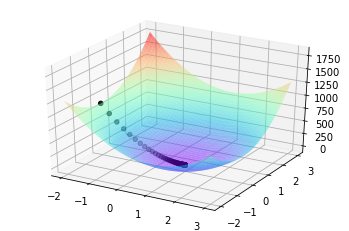

In [63]:
##Plot the 3d loss

fig=plt.figure()
axes=fig.gca(projection='3d')

axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k') #for theta0 0th column for theta1 1st column
#c=k ==black dots

axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5) #alpha trancparency
plt.show()

#we see that theta travels from 0 to the minima, to see clearly we are changing the value of theta
#givem initally to some other value

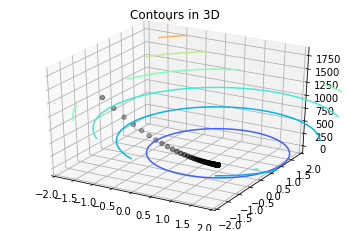

In [64]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.set_xlim([-2,2]) #axes ka range
axes.set_ylim([-2,2])
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c='k')  #c=k ==black dots
plt.title("Contours in 3D")
plt.show()

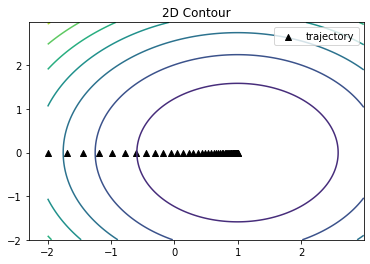

In [73]:
plt.contour(T0,T1,J)
plt.title("2D Contour")
plt.scatter(theta_list[:,0],theta_list[:,1],c='k',marker='^',label='trajectory')
plt.legend()
plt.show()

In [ ]:
#Tracing,plotting the trajectory how the descent happened